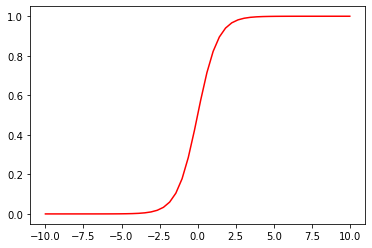

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
def function(data):
    return 1/(1+math.e**(-1.5*data))
x=np.linspace(-10,10)
y1 = function(x)
plt.plot(x,y1,'r')
plt.show()

Vamos a tomar una base de datos de Kaggle sobre los sobrevivientes del titanic
https://www.kaggle.com/c/titanic

In [7]:
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

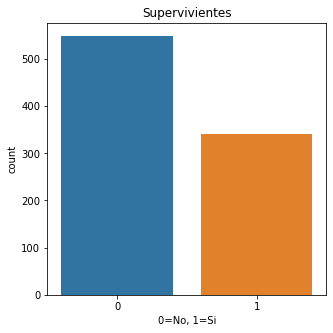

In [12]:
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Survived', data=df)
plt.title('Supervivientes')
plt.xlabel('0=No, 1=Si')
plt.show()


In [13]:
supervivientes = np.sum(df.Survived)
print(supervivientes)

342


In [14]:
noSupervivientes = df.shape[0]-np.sum(df.Survived)
print(noSupervivientes)

549


In [15]:
supervivientes/df.shape[0]

0.3838383838383838

In [17]:
noSupervivientes/df.shape[0]

0.6161616161616161

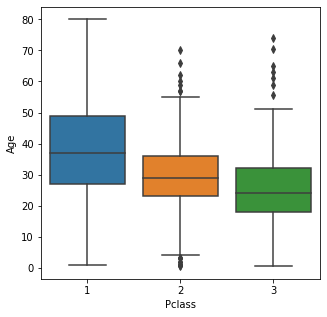

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

En el siguiente gráfico, vemos los sobrevivientes (o no) según la clase en la que viajaban

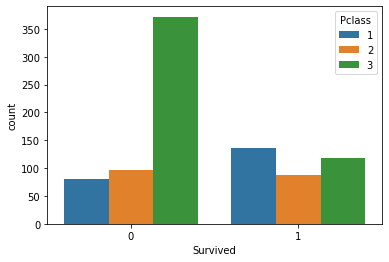

In [19]:
sns.countplot(x='Survived', hue='Pclass', data = df)
plt.show()

In [ ]:
Vemos el sexo en cada clase.

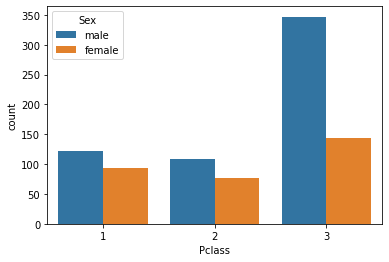

In [20]:
sns.countplot(x='Pclass', hue='Sex', data = df)
plt.show()

Descartando datos que no nos van a ser relevantes para saber si los pasajeros sobrevivieron o no.

In [21]:
df = df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Age'], axis = 1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


Vamos a cambiar algunos datos de la tabla por valores numéricos.
Empezamos cambiando los sexos: 'male' por '0' y 'female' por '1'

In [22]:
genders = {'male':0, 'female': 1}
data = [df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


Ahora cambiamos la columna de 'Embarked'

In [24]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [25]:
df['Embarked'].isnull().sum()

2

Como vemos que hay 2 valores nulos en la columna de 'Embarked' decidimos completar dichos lugares con el valor más repetido que vmos que es 'S'

In [26]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [27]:
#corroboramos que se llenaron los valores nulos:
df['Embarked'].isnull().sum()

0

Ahora convertimos los valores 'S' por '0', 'C' por '1' y 'Q' por '2'

In [28]:
ports={'S':0, 'C': 1, 'Q':2}
data=[df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [29]:
#cambiamos la columna 'Fare' por números de 0 a 5.
for dataset in data:
    dataset.loc[dataset['Fare']<= 10, 'Fare']=0
    dataset.loc[ (dataset['Fare']> 10) & (dataset['Fare']<=20) , 'Fare']=1
    dataset.loc[ (dataset['Fare']> 20) & (dataset['Fare']<=30) , 'Fare']=2
    dataset.loc[ (dataset['Fare']> 30) & (dataset['Fare']<=100) , 'Fare']=3
    dataset.loc[ (dataset['Fare']> 100) & (dataset['Fare']<=250) , 'Fare']=4
    dataset.loc[dataset['Fare'] > 250, 'Fare']= 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


Dividimos los datos de entrenamiento y testeo.

In [30]:
X_data = df.drop('Survived', axis=1)
y_survived = df['Survived']
X_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_data, y_survived, test_size = 0.3, random_state = 42)

Creamos nuestro modelo. La documentación puede encontrarse en https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_predict = logmodel.predict(X_test)

Vamos a evaluar nuestro modelo con una matriz de confusión.

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[131,  26],
       [ 32,  79]], dtype=int64)

<AxesSubplot:>

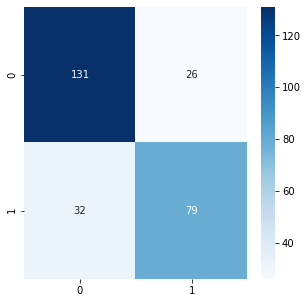

In [36]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')

Vamos a usar otras métricas para evaluar nuestro modelo

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



Vamos a guardar la tabla 'train' que fuimos limpiando a lo largo del trabajo.

In [38]:
df.to_csv('titanic_clean.csv', header = True)